In [28]:
from MD_functions import *
import matplotlib.pyplot as plt
from scipy import special
import math
from scipy.constants import hbar

results_folder = r"C:\Users\yaniv\Yehonathan TAU\Advenced_PhyChemLab2\MD\Lammps file"

# Harmonic Oscillator

## Energy

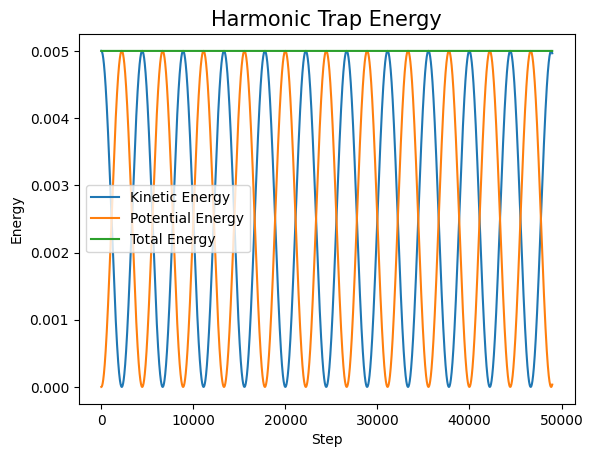

In [42]:
log_file = os.path.join(results_folder,"log_harmonic.lammps") #r'MD\Lammps file\log_harmonic.lammps'

harm_erg_df = read_log(log_file)
# display(harm_erg_df)
kinetic_erg, potential_erg, total_erg, steps = harm_erg_df['ke'], harm_erg_df['pe'], harm_erg_df['etotal'], harm_erg_df['Step']
end = 4900
plt.plot(steps[:end], kinetic_erg[:end], label='Kinetic Energy')
plt.plot(steps[:end], potential_erg[:end], label='Potential Energy')
plt.plot(steps[:end], total_erg[:end], label='Total Energy')
plt.xlabel('Step')
plt.ylabel('Energy')
plt.legend()
plt.title('Harmonic Trap Energy', fontsize=15)
plt.show()

## Position

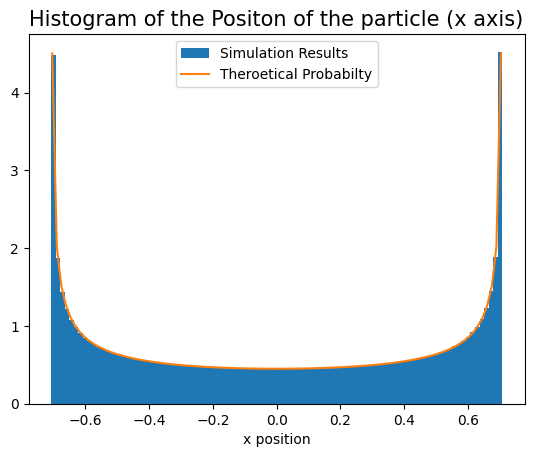

In [30]:
pos_file = os.path.join(results_folder,"dump_output_harmonic_big.lammpstrj")
harm_pos_df = read_lammpstrj(pos_file)
x = harm_pos_df['x']
steps = harm_pos_df['Timestep']
k = 0.02
mass = 1.0
v0 = 0.1
end = 500
# plt.plot(steps[:end], x[:end], label='Potential Energy')
# plt.xlabel('Step')
# plt.ylabel('Energy')
# plt.legend()
# plt.show()
# print(max(x), min(x))

plt.hist(x, bins=100,density=True, label= 'Simulation Results') # x in angstram
x_max = np.sqrt(mass / k) * v0
x_show = np.linspace(-x_max*0.995,x_max * 0.995,100)
y = 1 / (np.pi * np.sqrt(x_max**2 - x_show ** 2))
plt.plot(x_show, y, label = 'Theroetical Probabilty')
plt.legend(loc ='best')
plt.title('Histogram of the Positon of the particle (x axis)', fontsize=15)
plt.xlabel(r'x position')
plt.show()

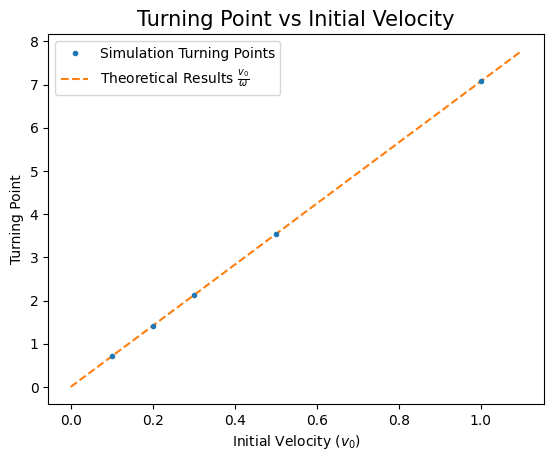

In [ ]:

v_list = [0.1,0.2,0.3,0.5,1]
turning_points = []
x_turning_theo = np.sqrt(mass / k) * v0

for v0 in v_list:
    file_path = os.path.join(results_folder,"dump_output_harmonic_v0_{}.lammpstrj".format(v0))
    harm_pos_df = read_lammpstrj(file_path)
    x = harm_pos_df['x']
    x_turning_mes = (max(x) - min(x)) / 2 #turning point
    turning_points.append(x_turning_mes)

plt.plot(v_list, turning_points,'.', label='Simulation Turning Points')
plt.plot(np.array([0,1.1]),  np.sqrt(mass / k) * np.array([0,1.1]),'--', label=r'Theoretical Results $\frac{v_0}{\omega}$', zorder = 0)
plt.xlabel(r'Initial Velocity ($v_0$)')
plt.ylabel(r'Turning Point')
plt.legend()
plt.title('Turning Point vs Initial Velocity', fontsize=15)
plt.show()

## Quantum Harmonic Oscillator

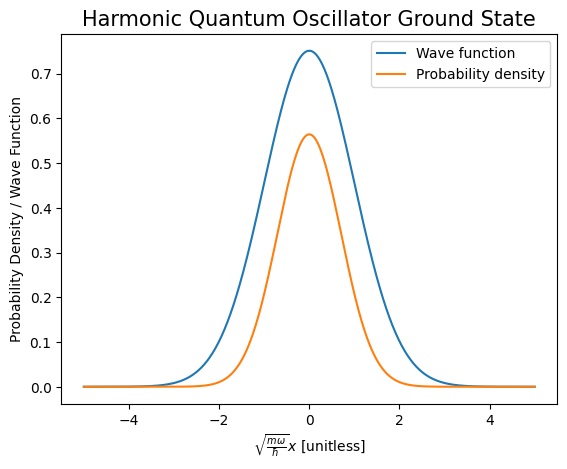

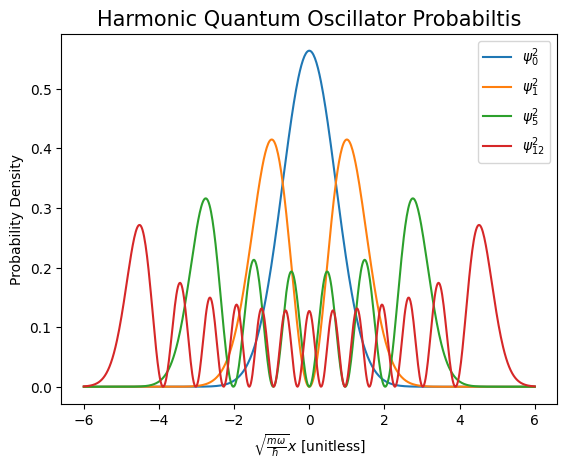

In [5]:
hermite_0 = special.hermite(1, monic=True)
psi_n = lambda x,n: (np.sqrt(np.pi) * 2**n * math.factorial(n))**(-1/2) * np.exp(-x**2/2) * special.hermite(n)(x)
x_show = np.linspace(-5,5,600)

psi_3 = lambda x: 1/np.sqrt( np.sqrt(np.pi) * 2 ** 3 * math.factorial(3)) * np.exp(-x**2/2) * (8 * x**3 - 12 * x)
plt.plot(x_show, psi_n(x_show,0), label='Wave function')
plt.plot(x_show, psi_n(x_show,0)**2 , label='Probability density')
plt.legend(loc = 'upper right')
plt.xlabel(r'$\sqrt{\frac{m \omega}{\hbar}}x$ [unitless]')
plt.title('Harmonic Quantum Oscillator Ground State', fontsize=15)
plt.ylabel('Probability Density / Wave Function')
plt.show()
x_show = np.linspace(-6,6,600)

for n in [0,1,5,12]:
    prob_n = psi_n(x_show,n)**2
    integral_prob_n = np.trapz(prob_n, x_show) 
    # print(f"Integral of probability density for n={n}: {integral_prob_n}")
    label = fr'$\psi ^2_{{{n}}}$'
    plt.plot(x_show, prob_n, label=label)
# plt.plot(x_show, psi_3(x_show)**2 , label='3')
plt.legend(loc = 'upper right')
plt.xlabel(r'$\sqrt{\frac{m \omega}{\hbar}}x$ [unitless]')
plt.title('Harmonic Quantum Oscillator Probabiltis', fontsize=15)
plt.ylabel('Probability Density')
plt.show()


# Interaction potential

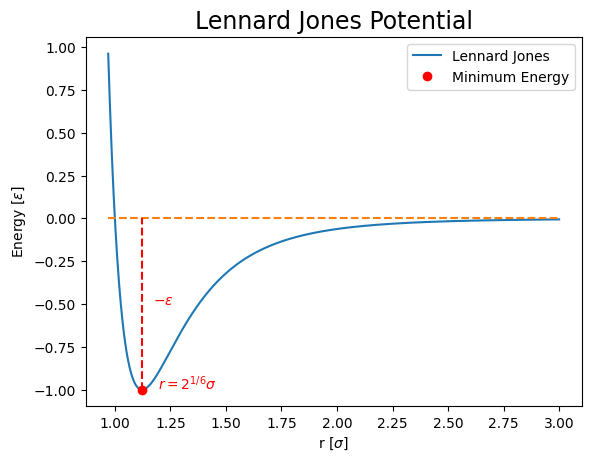

r_W = 2.05 Angstrom
V_LJ(6.0) = -0.647 kJ/mol


In [10]:
r_show = np.linspace(0.97,3, 1000)
r_min = 2 ** (1/6) # units of sigma

plt.plot(r_show, Leonard_Jones(r_show, 1, 1), label='Lennard Jones')
plt.xlabel(r'r $\left[\sigma \right]$')
plt.ylabel(r'Energy $\left[\epsilon \right]$')
plt.plot(r_min,-1, 'ro', label='Minimum Energy')
plt.plot(r_show, 0 * r_show, '--')
plt.title('Lennard Jones Potential', fontsize=17)
plt.vlines(r_min, -1, 0, colors='r', linestyles='dashed')

plt.text(r_min + 0.05, -1 /2 , r'$-\epsilon$', color='r', fontsize=10)
plt.text(r_min + 0.07, -1 , r'$r=2^{1/6} \sigma$', color='r', fontsize=10)

plt.legend()
plt.show()

# For Xenon
sigma = 4.10 # Angstrom
epsilon = 1.77 # kJ/mol
r_W = 1/2 * sigma
print(f"r_W = {r_W} Angstrom")
print(f"V_LJ(6.0) = {Leonard_Jones(6.0, epsilon, sigma):.3f} kJ/mol")

# NVT enssamble

## Phases

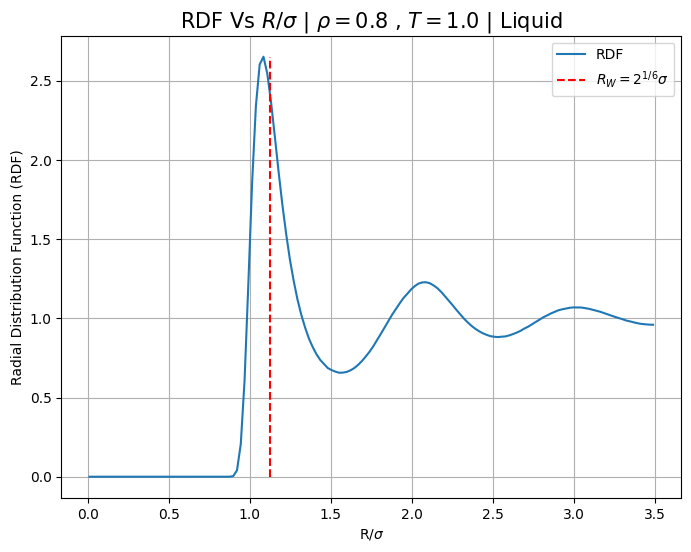

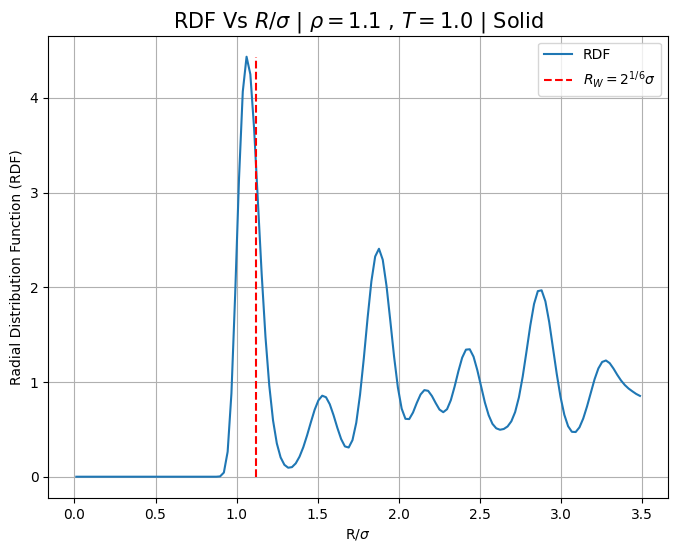

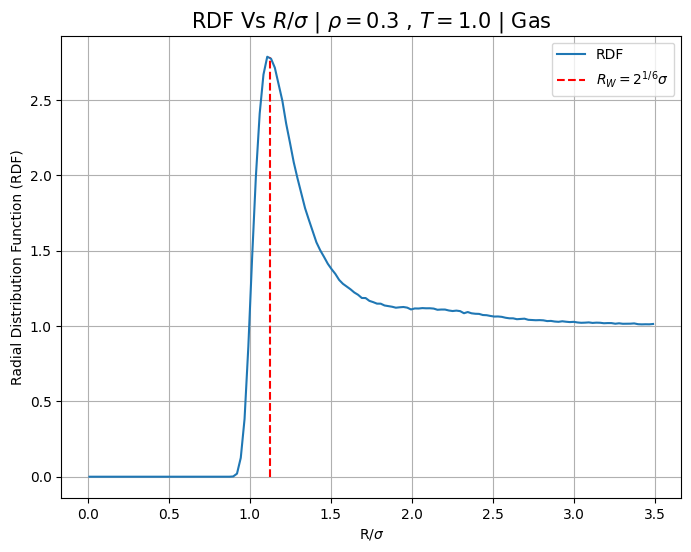

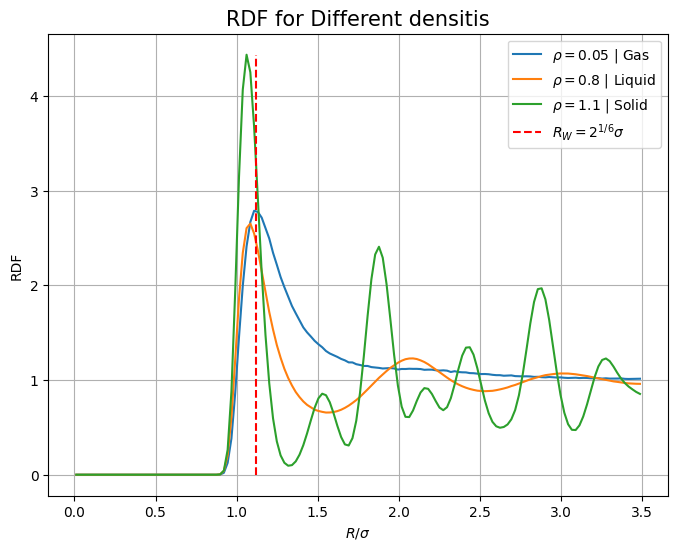

In [ ]:
# Liquid
file_path_08 = os.path.join(results_folder, "rdf_lj_0.8.out")
_, __ = plot_rdf(file_path_08, r"RDF Vs $R/\sigma$ | $\rho = 0.8$ , $T = 1.0$ | Liquid")
# Solid
file_path_11 = os.path.join(results_folder, "rdf_lj_1.1.out")
_, __ = plot_rdf(file_path_11, r"RDF Vs $R/\sigma$ | $\rho = 1.1$ , $T = 1.0$ | Solid")
# Gas
file_path_03 = os.path.join(results_folder, "rdf_lj_0.05.out")
_, __ = plot_rdf(file_path_03, r"RDF Vs $R/\sigma$ | $\rho = 0.3$ , $T = 1.0$ | Gas")

density_list = [0.05,0.8,1.1]
phase_dict = {0.05: 'Gas', 0.8: 'Liquid', 1.1: 'Solid'}
max_rdf = 0
plt.figure(figsize=(8, 6))
for density in density_list:
    ""
    file_path = os.path.join(results_folder, f"rdf_lj_{density}.out")
    R, RDF = plot_rdf(file_path, Plot=False)
    plt.plot(R, RDF, label=fr'$\rho= {density}$ | {phase_dict[density]}')
    max_rdf = max(max_rdf, max(RDF))
plt.vlines(2 ** (1/6), 0,max_rdf, colors='r', linestyles='dashed', label=r'$R_{W}= 2^{1/6} \sigma$')
plt.xlabel(r'$R/\sigma$')
plt.ylabel(r'RDF')
plt.title('RDF for Different densitis', fontsize=15)
plt.grid()
plt.legend()
plt.show()
    



## Cooling

### 

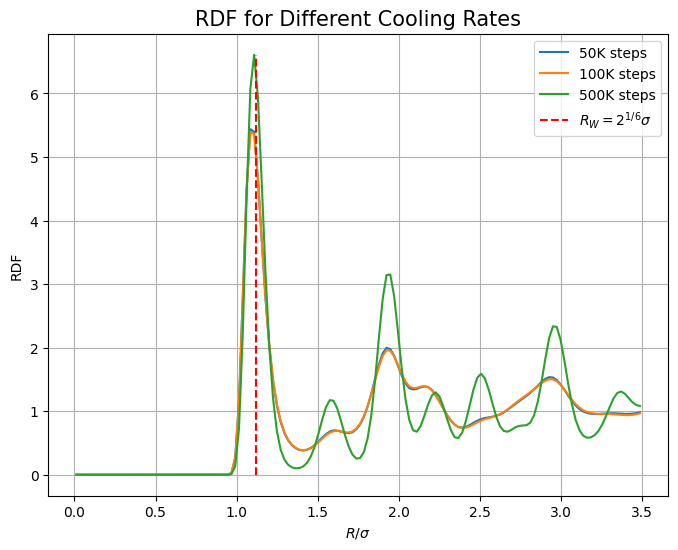

In [78]:
NumStep_list = [50000,100000,500000]
max_rdf = 0
plt.figure(figsize=(8, 6))
for NumStep in NumStep_list:
    ""
    file_path = os.path.join(results_folder, f"rdf_lj_relaxation_density_0.8_NumStep_{NumStep}.out")
    R, RDF = plot_rdf(file_path, Plot=False)
    plt.plot(R, RDF, label=f'{int(NumStep/1000)}K steps')
    max_rdf = max(max_rdf, max(RDF))
plt.vlines(2 ** (1/6), 0,max_rdf, colors='r', linestyles='dashed', label=r'$R_{W}= 2^{1/6} \sigma$')
plt.xlabel(r'$R/\sigma$')
plt.ylabel(r'RDF')
plt.title('RDF for Different Cooling Rates', fontsize=15)
plt.legend()
plt.grid()
plt.show()
    